<a href="https://colab.research.google.com/github/koushik2299/Item-Store-Sale-Prediction-/blob/main/Final_Cleaning%2BEDA%2BModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ITEM SALES PREDICTION**

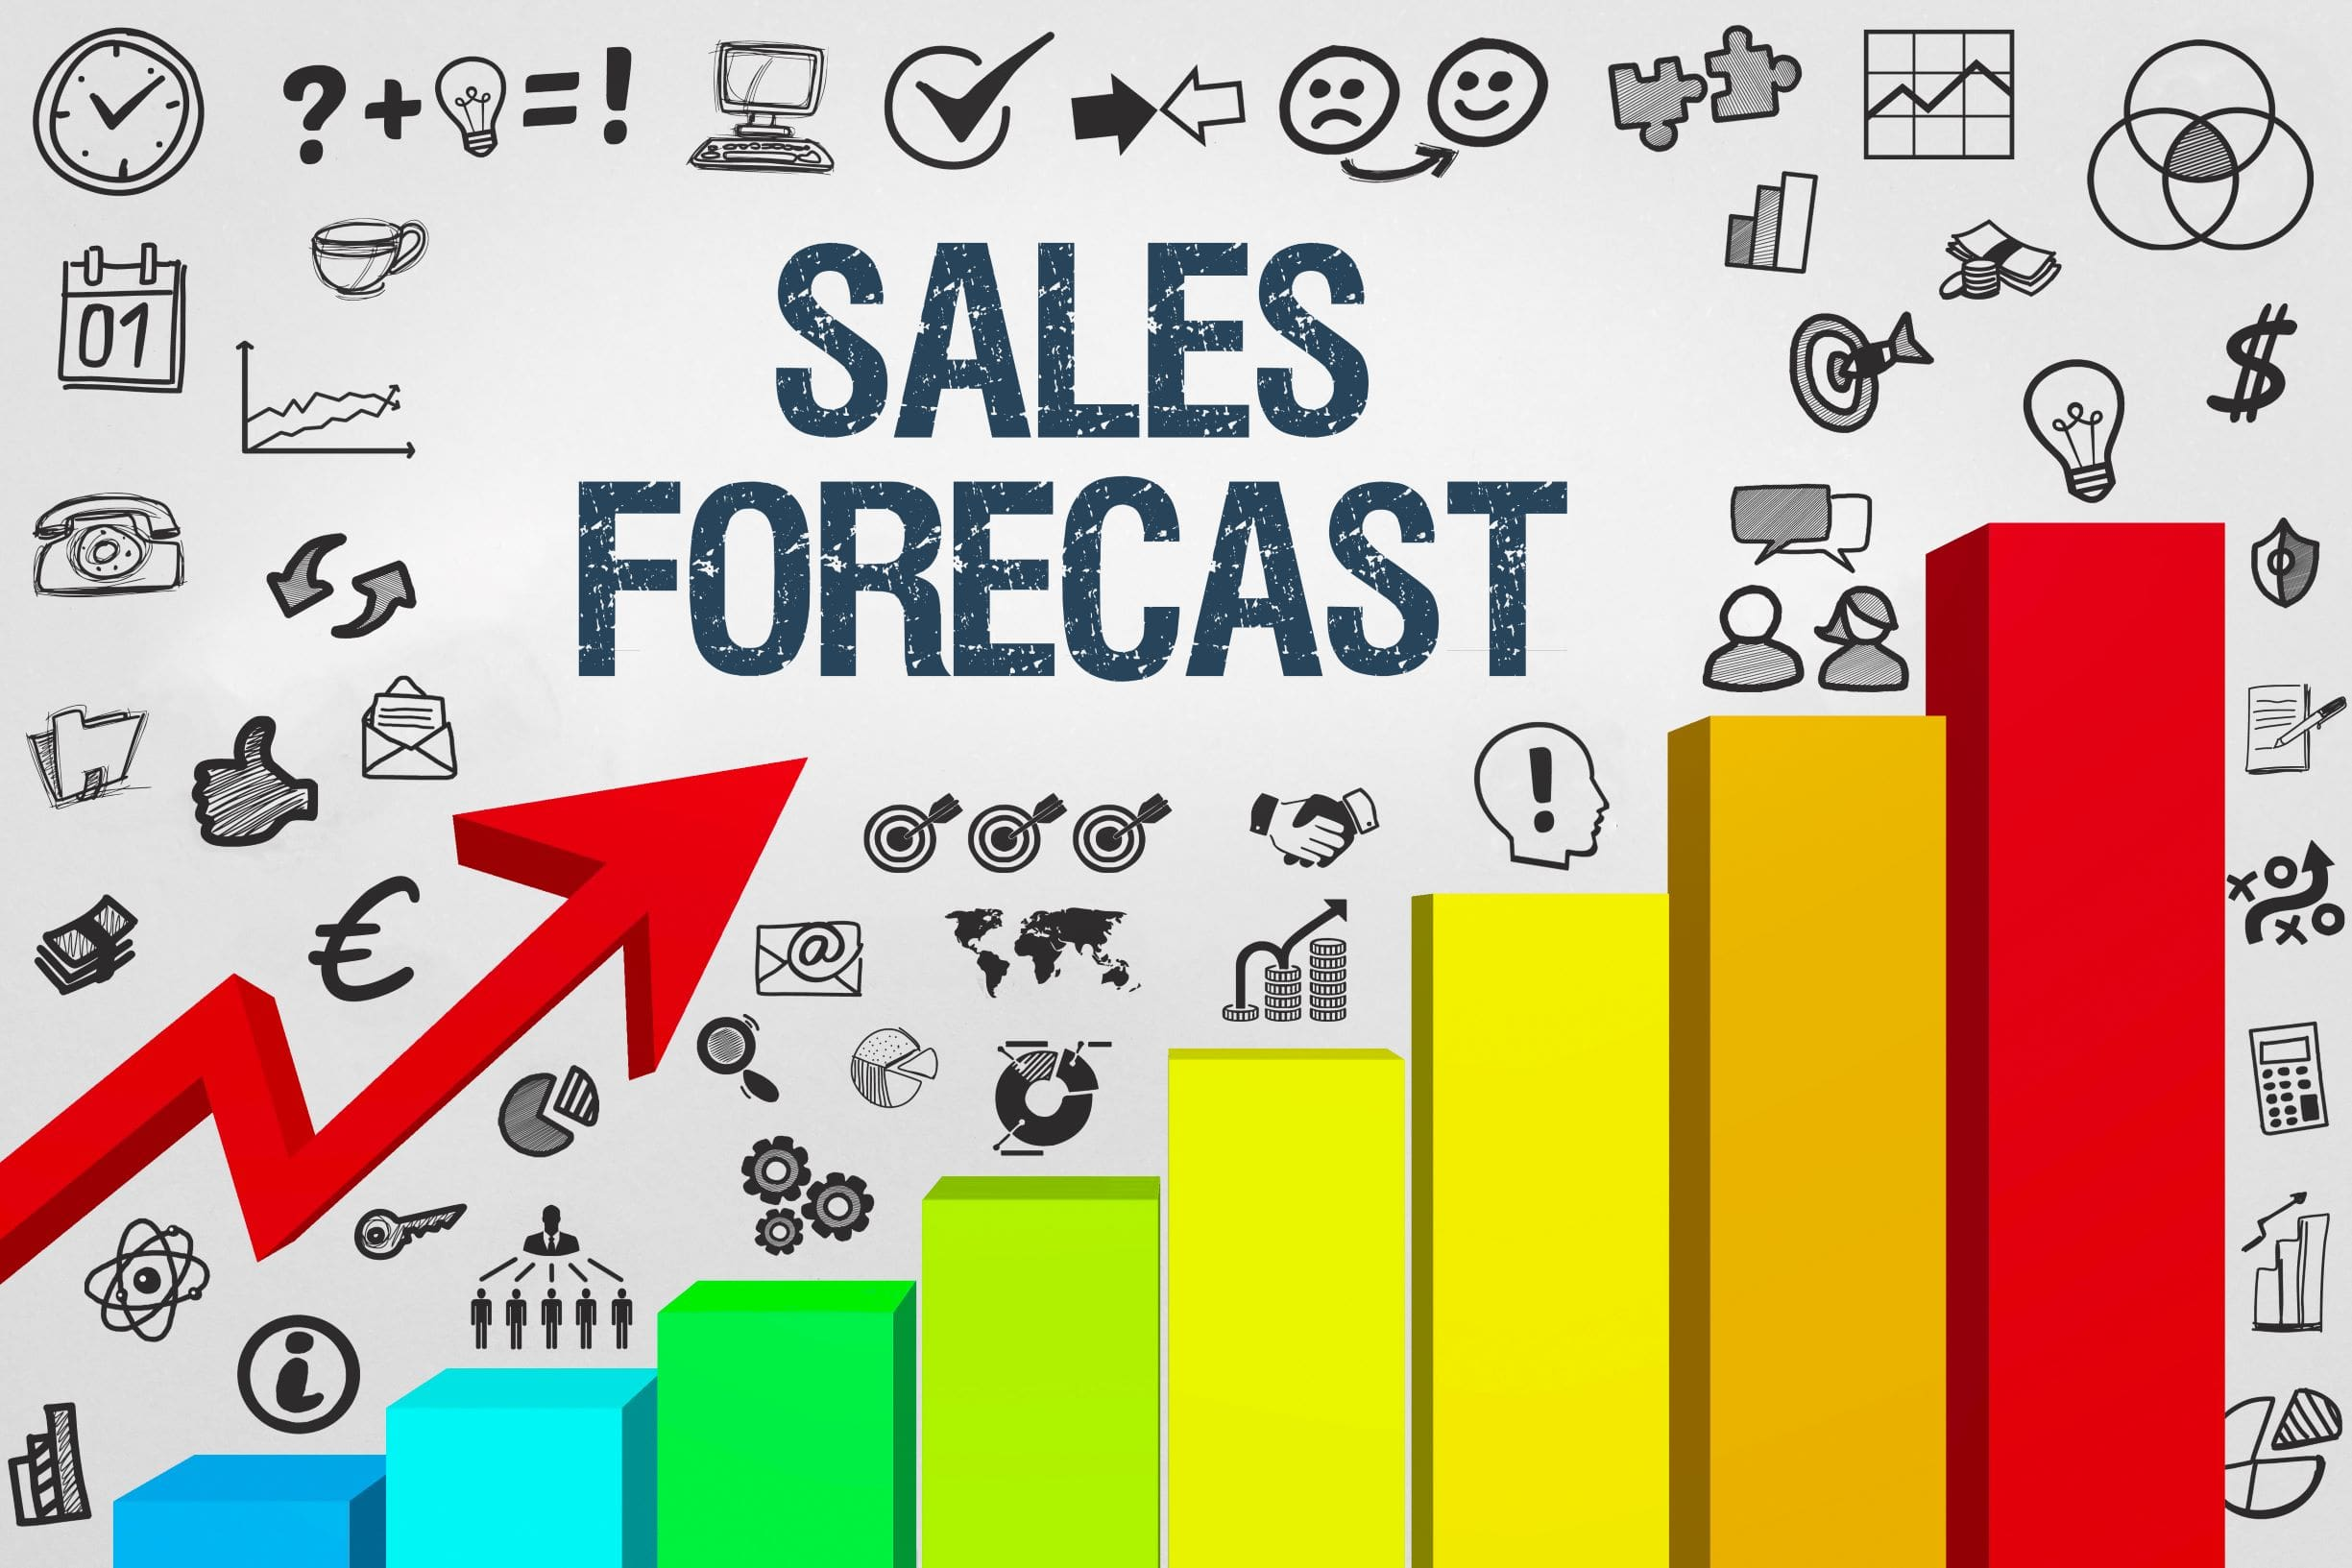

In [124]:
from IPython.display import Image
Image('/content/Forecast-Sales-using-Machine-Learning.jpeg', width=600, height=None)


# Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
! pip install xgboost
import xgboost as xgb
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

Loading the DataSet

In [4]:
original=pd.read_csv("/content/Train.csv")

In [5]:
original.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Exploratory data analysis**

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves summarizing and visualizing the main characteristics of a dataset to better understand the data and identify patterns, trends, and outliers. 

In [6]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
original.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#Unique Items in all the Categorical Columns

ls=['Item_Fat_Content','Outlet_Type','Outlet_Size','Item_Type','Outlet_Location_Type']
for i in ls:
  print(i,":",original[i].unique())

Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Outlet_Size : ['Medium' nan 'High' 'Small']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']


## Missing Values

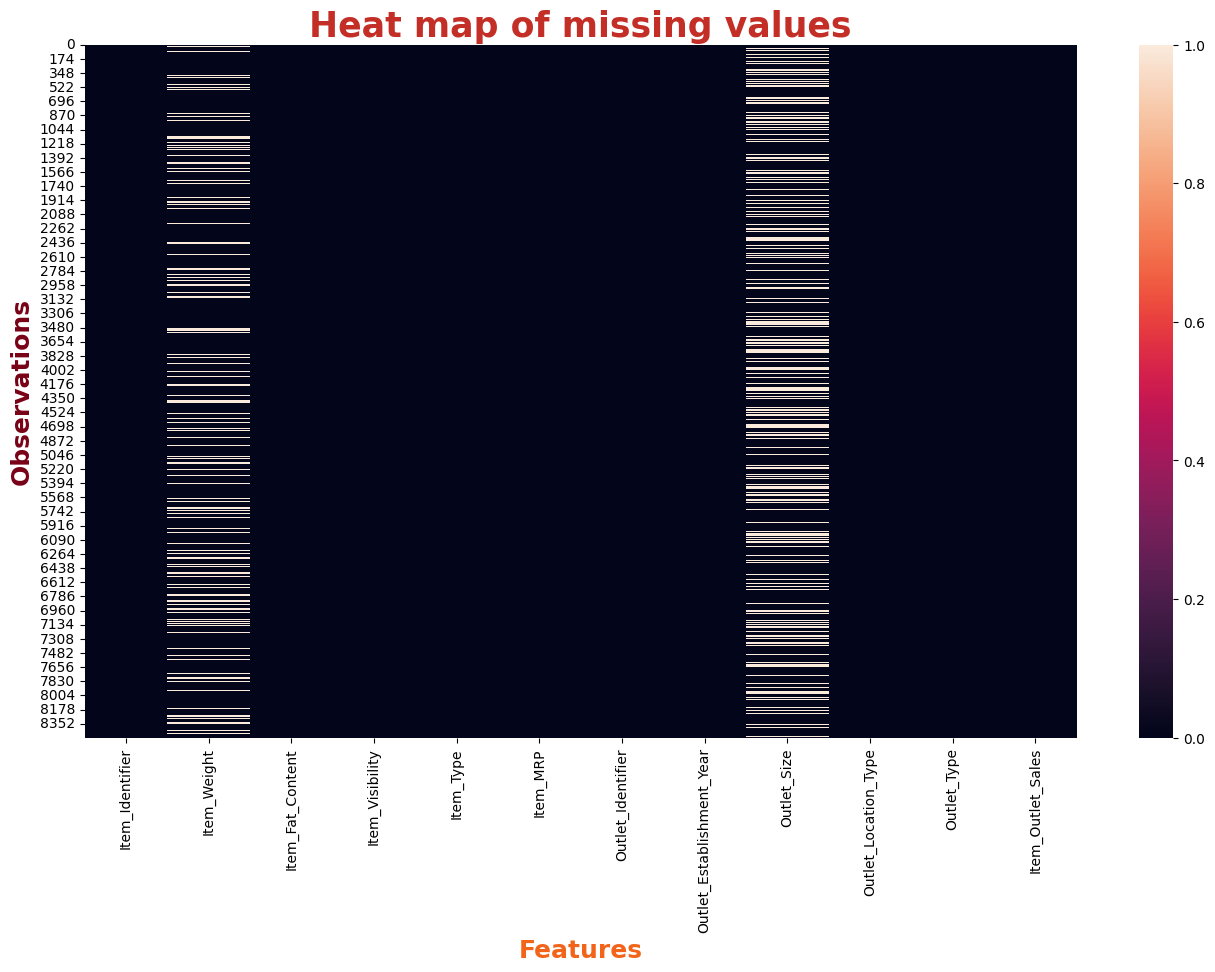

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(original.isna())

plt.xlabel("Features",size=18,color="#f26419",fontweight="bold")
plt.ylabel("Observations",size=18,color="#780116",fontweight="bold")
plt.title("Heat map of missing values",size=25,fontweight="bold",color="#c32f27")
plt.show()

In [10]:
missing_value_percentage=pd.DataFrame(original.isna().sum()*100/8523)

In [11]:
missing_value_percentage.reset_index(level=0,inplace=True)

In [12]:
missing_value_percentage.columns=["Features","Percentage_of_NA"]
missing_value_percentage

,Features,Percentage_of_NA
0,Item_Identifier,0.000000
1,Item_Weight,17.165317
2,Item_Fat_Content,0.000000
3,Item_Visibility,0.000000
4,Item_Type,0.000000
5,Item_MRP,0.000000
6,Outlet_Identifier,0.000000
7,Outlet_Establishment_Year,0.000000
8,Outlet_Size,28.276428
9,Outlet_Location_Type,0.000000


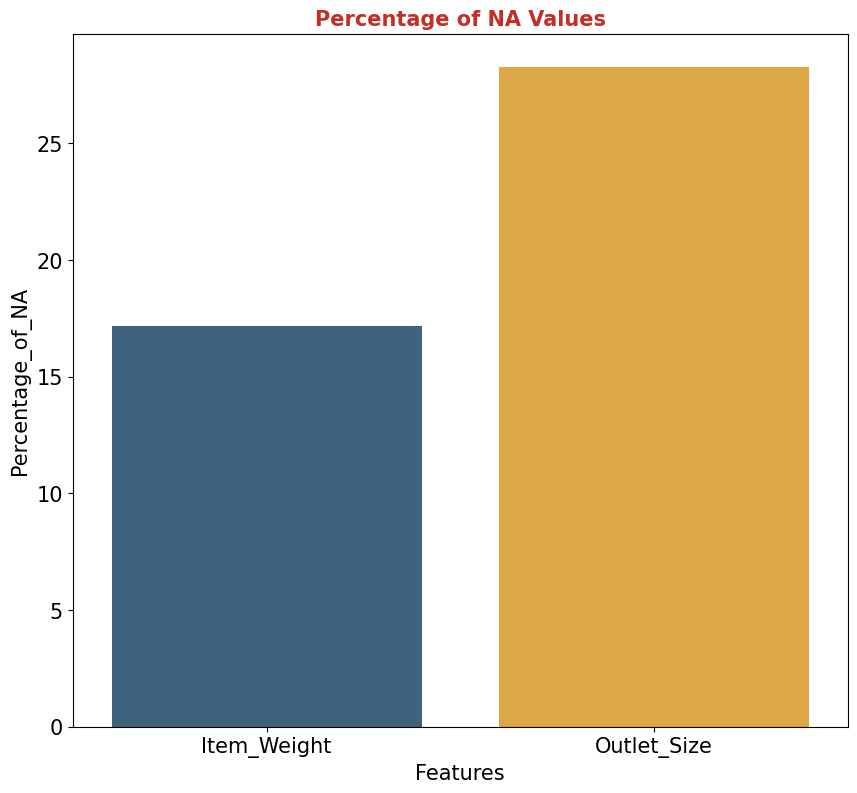

In [13]:
plt.figure(figsize=(10,9))
sns.barplot(x="Features",y="Percentage_of_NA",data=missing_value_percentage[missing_value_percentage["Percentage_of_NA"]>0],palette=['#33658a','#f6ae2d'])
plt.xlabel("Features",size=15)
plt.ylabel("Percentage_of_NA",size=15)
plt.title("Percentage of NA Values",size=15,fontweight="bold",color="#c32f27")
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

## **Visualization**

Corelational Analysis

<ipython-input-14-dc3ac5f69997>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(original.corr(),annot=True)


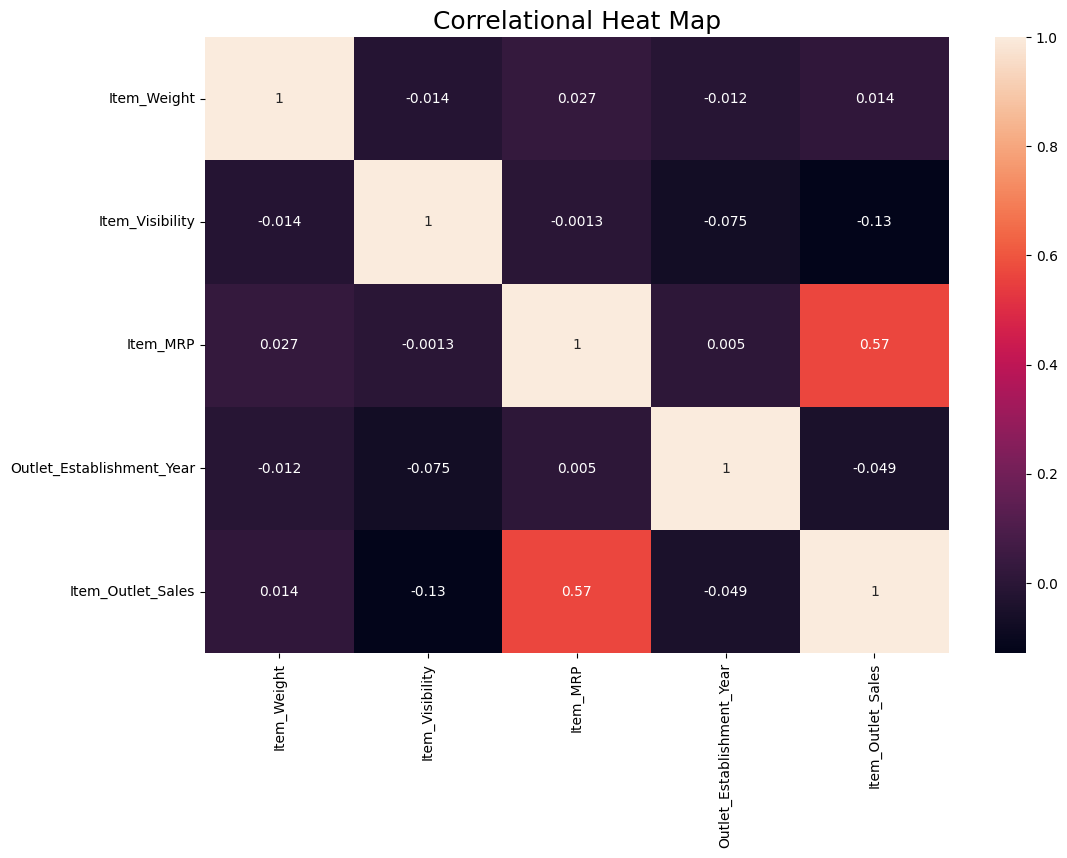

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(original.corr(),annot=True)
plt.title("Correlational Heat Map",size=18)
plt.show()

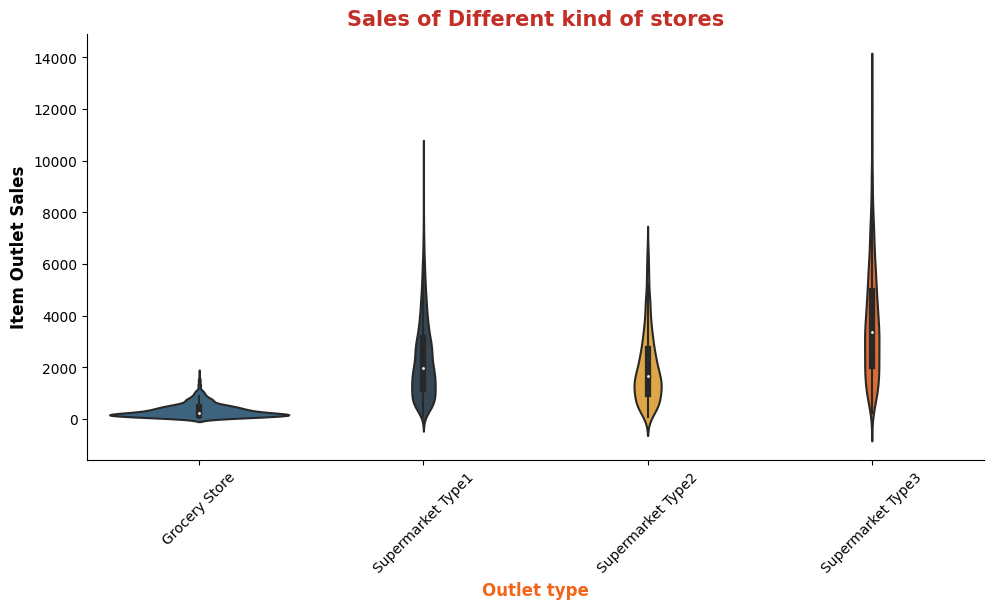

In [15]:
custom_palette = sns.color_palette(['#33658a', '#2f4858', '#f6ae2d','#f26419'])
sns.catplot(data=original, x="Outlet_Type", y="Item_Outlet_Sales",kind="violin",height=5, aspect=2,order=["Grocery Store","Supermarket Type1","Supermarket Type2","Supermarket Type3"],palette=custom_palette)
plt.title("Sales of Different kind of stores",size=15,fontweight="bold",color="#c32f27")
plt.xlabel("Outlet type",size=12,color="#f26419",fontweight="bold")
plt.ylabel("Item Outlet Sales",size=12,fontweight="bold")
plt.xticks(rotation=45)
plt.show()

In [16]:
original["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

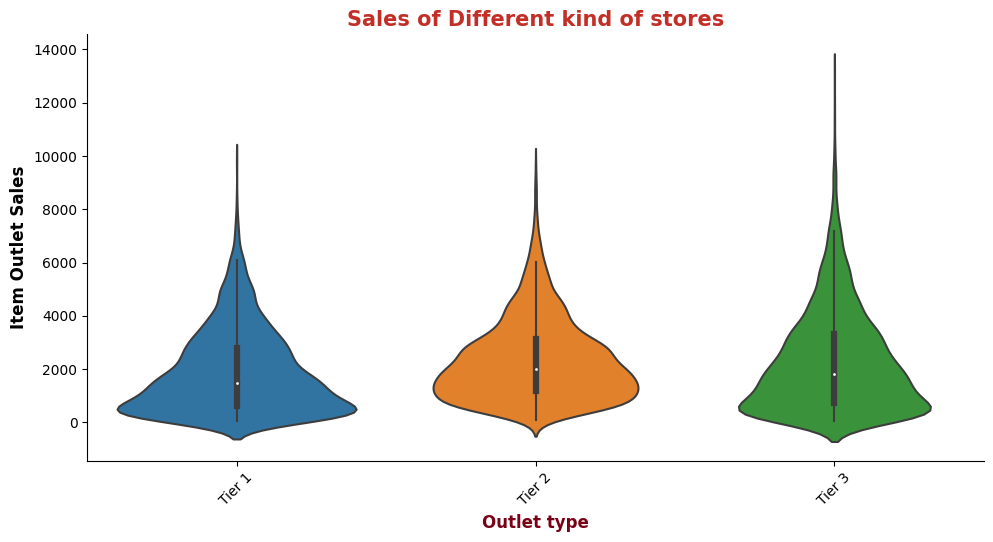

In [17]:
from pandas._libs.algos import pad_inplace
sns.catplot(data=original, x="Outlet_Location_Type", y="Item_Outlet_Sales",kind="violin",height=5, aspect=2,order=["Tier 1", "Tier 2","Tier 3"])
plt.title("Sales of Different kind of stores",size=15,fontweight="bold",color="#c32f27")
plt.xlabel("Outlet type",size=12,color="#780116",fontweight="bold")
plt.ylabel("Item Outlet Sales",size=12,fontweight="bold")
plt.xticks(rotation=45)
plt.show()

Store which are present in **Tier 3** have more sales than Tier 1 and Tier 2

**Distributions of Numerical Features**

<ipython-input-18-4e38e8915c44>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original['Item_Outlet_Sales'], color='#33658a', bins=30, kde=True)


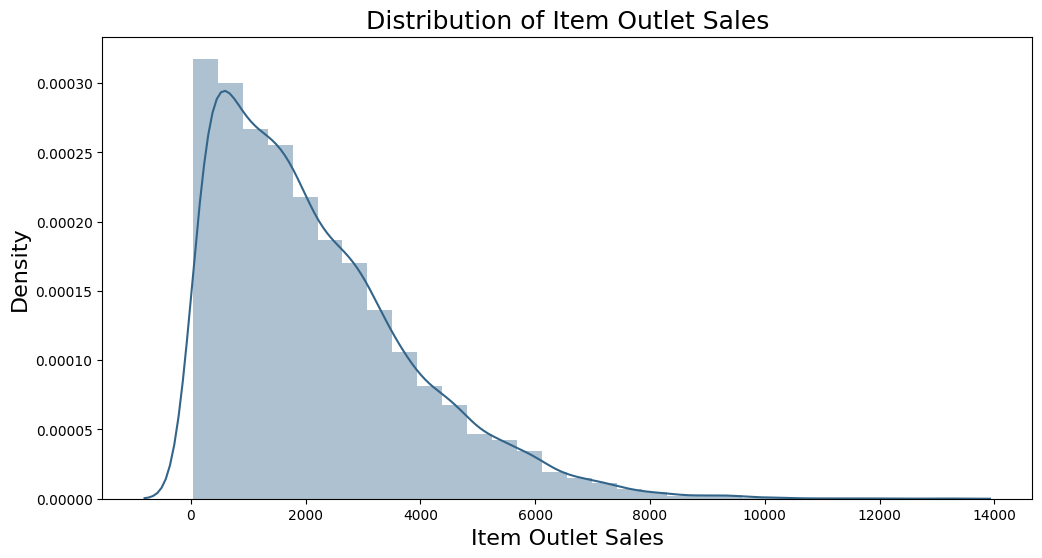

In [18]:
plt.figure(figsize=(12,6))
sns.distplot(original['Item_Outlet_Sales'], color='#33658a', bins=30, kde=True)
plt.xlabel('Item Outlet Sales',size=16)
plt.ylabel('Density',size=16)
plt.title('Distribution of Item Outlet Sales',size=18)
plt.show()

<ipython-input-19-44052f15f43b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original['Item_Weight'], color='#2f4858', bins=30, kde=True)


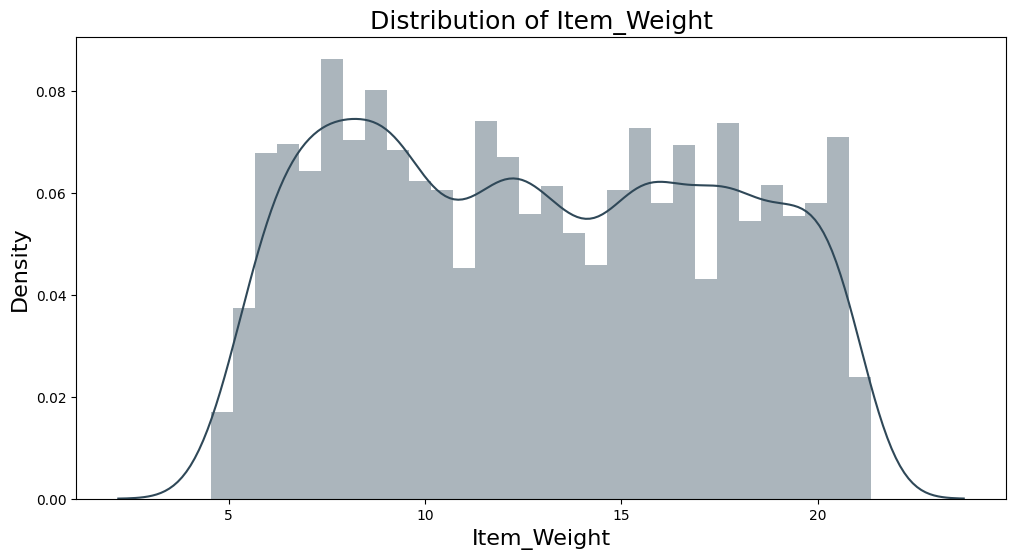

In [19]:
plt.figure(figsize=(12,6))
sns.distplot(original['Item_Weight'], color='#2f4858', bins=30, kde=True)
plt.xlabel('Item_Weight',size=16)
plt.ylabel('Density',size=16)
plt.title('Distribution of Item_Weight',size=18)
plt.show()

<ipython-input-20-26b663b9f706>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original['Item_MRP'], color='#f6ae2d', bins=30, kde=True)


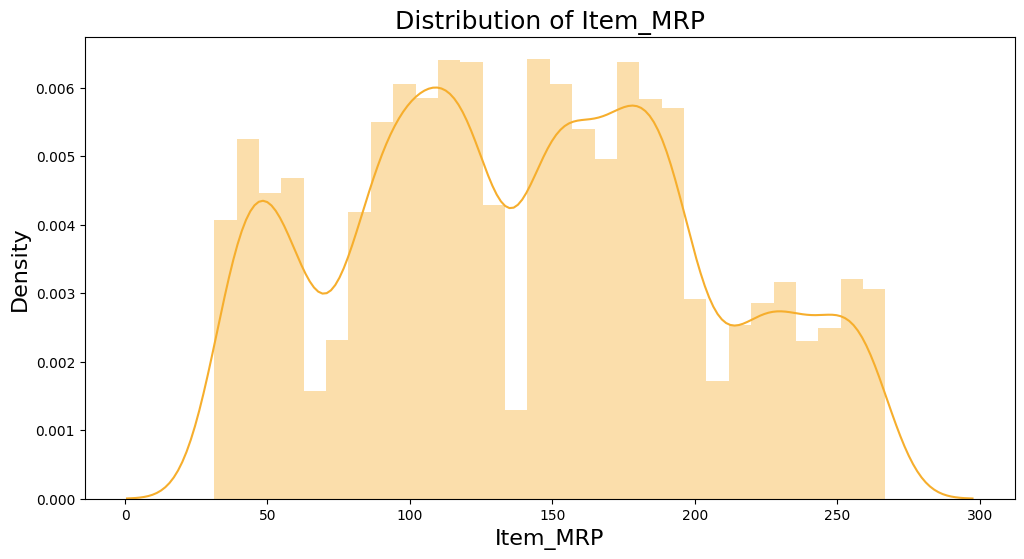

In [20]:
plt.figure(figsize=(12,6))
sns.distplot(original['Item_MRP'], color='#f6ae2d', bins=30, kde=True)
plt.xlabel('Item_MRP',size=16)
plt.ylabel('Density',size=16)
plt.title('Distribution of Item_MRP',size=18)
plt.show()

Lets see if there is any impact on sales on basis of Outlet Establisment Year

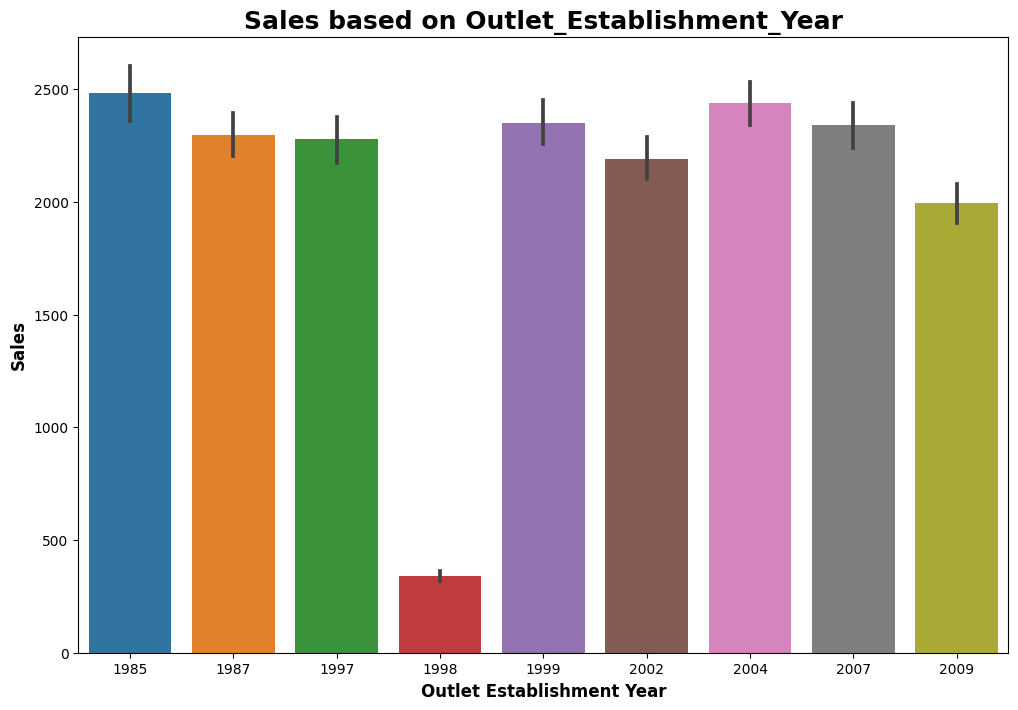

In [21]:
plt.figure(figsize=(12,8))
plt.title('Sales based on Outlet_Establishment_Year',size=18,fontweight="bold")
sns.barplot(data=original,x="Outlet_Establishment_Year",y="Item_Outlet_Sales")
plt.xlabel("Outlet Establishment Year",size=12,fontweight="bold")
plt.ylabel("Sales",size=12,fontweight="bold")
plt.show()

Seems like every year is having similar Sales except 1998, Lets find out why

In [22]:
original["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Heres the reason why clearly the 1998 records are low. From this we can infer that theres is some difference in number of columns to aviod this lets take mean of the years

In [23]:
est_sales = original.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
est_sales

Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

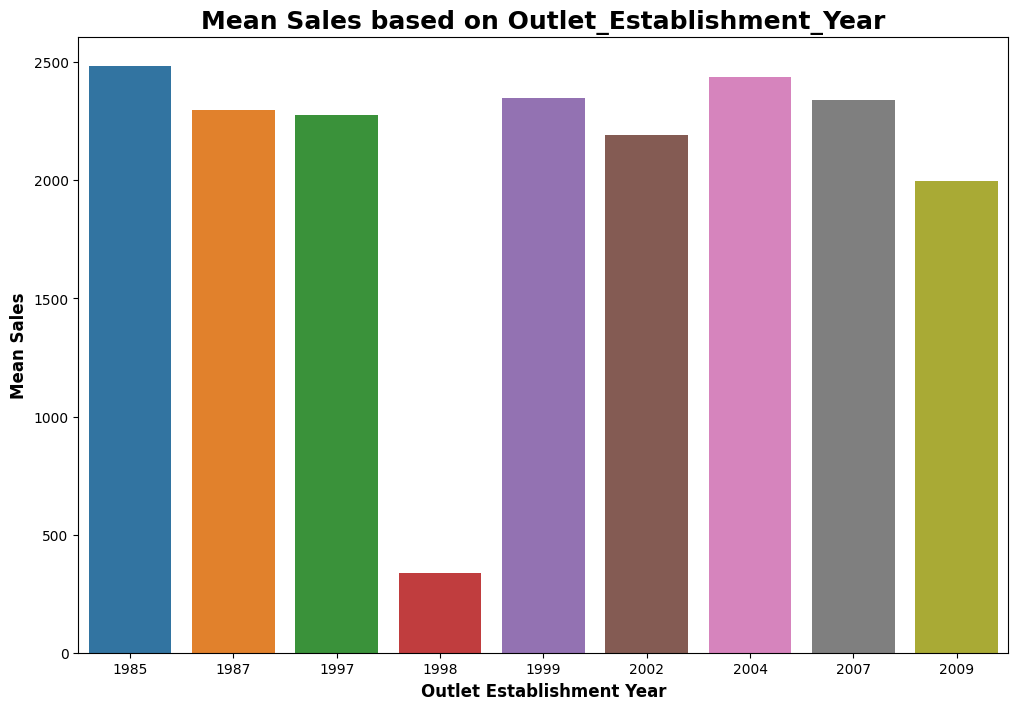

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.title('Mean Sales based on Outlet_Establishment_Year',size=18,fontweight="bold")
est_sales = original.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
sns.barplot(x=est_sales.index, y=est_sales.values)
plt.xlabel("Outlet Establishment Year",size=12,fontweight="bold")
plt.ylabel("Mean Sales",size=12,fontweight="bold")
plt.show()

Even we took mean into consideration the average is less. So, based on this the stroes which got established in 1998 are less in sales

# **Pre-Processing**

In [25]:
df=original

## Handling Missing Values

Creating a copy of the dataset inorder to retain the Original DATASET

Assuming Outlet type and Outlet Size are correlated based on domain knowledge. 
Lets see the corealtion by uing contigency matrix 

In [26]:
# Create a contingency table of Outlet Type and Outlet Size
contingency_table = pd.crosstab(df['Outlet_Type'], df['Outlet_Size'], margins=True)

# Print the contingency table
print(contingency_table)

Outlet_Size        High  Medium  Small   All
Outlet_Type                                 
Grocery Store         0       0    528   528
Supermarket Type1   932     930   1860  3722
Supermarket Type2     0     928      0   928
Supermarket Type3     0     935      0   935
All                 932    2793   2388  6113


In [27]:
# Calculate the percentage of each Outlet Type that falls into each Outlet Size category
outlet_type_size_pct = contingency_table.div(contingency_table['All'], axis=0).iloc[:-1, :-1]

# Print the percentage table
print(outlet_type_size_pct)

Outlet_Size            High    Medium     Small
Outlet_Type                                    
Grocery Store      0.000000  0.000000  1.000000
Supermarket Type1  0.250403  0.249866  0.499731
Supermarket Type2  0.000000  1.000000  0.000000
Supermarket Type3  0.000000  1.000000  0.000000


In [28]:
# Impute missing Outlet Size values based on the percentage table
for idx, row in df[df['Outlet_Size'].isnull()].iterrows():
    outlet_type = row['Outlet_Type']
    outlet_size = outlet_type_size_pct.loc[outlet_type].idxmax()
    df.loc[idx, 'Outlet_Size'] = outlet_size

In [29]:
grouped = df.groupby("Item_Type")
item_type_mean = grouped["Item_Weight"].mean()

print(item_type_mean)

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64


In [30]:
df.groupby("Item_Type").agg({'Item_Weight':'mean'})

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [31]:
grouped = df.groupby('Item_Type')['Item_Weight'].mean()

# Loop through each group and impute the missing values with the mean value of the group
for item_type, mean_weight in grouped.iteritems():
    df.loc[df['Item_Type'] == item_type, 'Item_Weight'] = df.loc[df['Item_Type'] == item_type, 'Item_Weight'].fillna(mean_weight)


<ipython-input-31-64dc5df062b3>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item_type, mean_weight in grouped.iteritems():


In [32]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Dealing with Categorical Variables


In [33]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [34]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [35]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

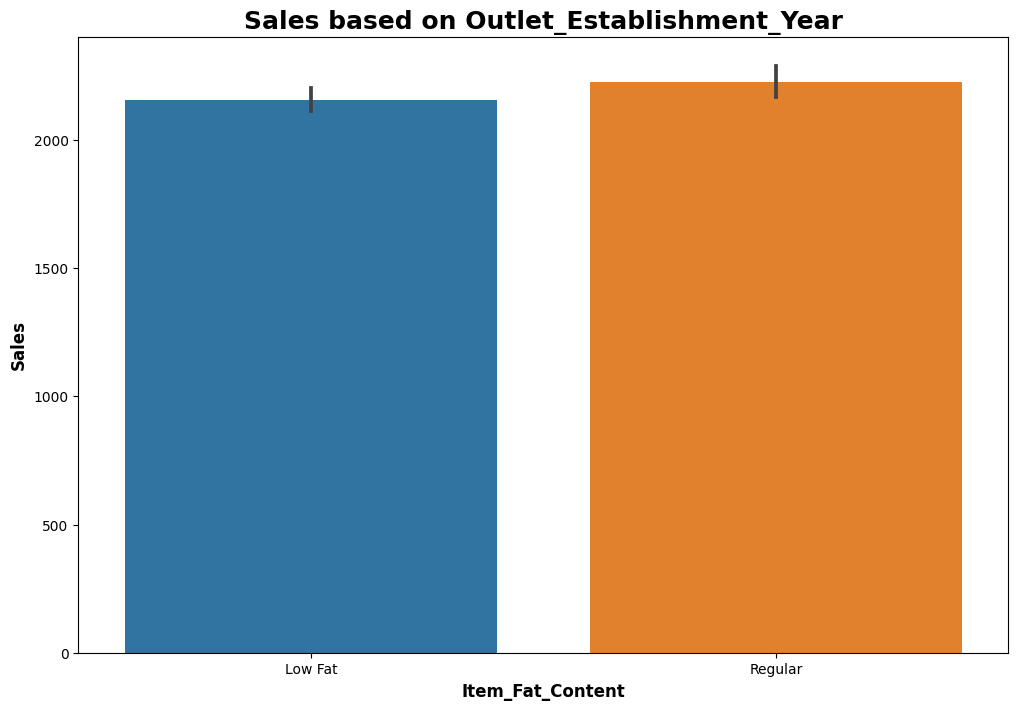

In [36]:
plt.figure(figsize=(12,8))
plt.title('Sales based on Outlet_Establishment_Year',size=18,fontweight="bold")
sns.barplot(data=df,x="Item_Fat_Content",y="Item_Outlet_Sales")
plt.xlabel("Item_Fat_Content",size=12,fontweight="bold")
plt.ylabel("Sales",size=12,fontweight="bold")
plt.show()

**Label Encoding**

Label encoding is an important technique in data preprocessing, especially for categorical data. It involves converting categorical values into numeric labels that can be easily processed by machine learning models.

In [37]:
encoder = LabelEncoder()

In [38]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Modelling before Feature Engineering

Function which trains the models and evaluates the metrics 

In [40]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def modeling(regg_models, X_train, X_test, y_train, y_test, X, y):
    # Making list to append scores in the Metrics for Regression
    R2_score = []
    Score_Train = []
    Score_Test = []
    RMSE = []
    MAE = []
    Error = []
    MSE = []
    mean = []
    std = []

    # Making dictionary to store results
    results = {}

    for i in regg_models:    
        train_model = i.fit(X_train, y_train)
        y_pred = train_model.predict(X_test)
        
        # R2 Score
        r2score = metrics.r2_score(y_test, y_pred)
        R2_score.append(r2score)
        
        # Score training dataset
        scoretrain = train_model.score(X_train, y_train)
        Score_Train.append(scoretrain)
        
        # Score testing dataset
        scoretest = train_model.score(X_test, y_test)
        Score_Test.append(scoretest)

        # Normalized RMSE
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y) - min(y))
        RMSE.append(rmse)   
        
        # MSE
        mse = metrics.mean_squared_error(y_test, y_pred)
        MSE.append(mse)   
        
        # MAE
        mae = metrics.mean_absolute_error(y_test, y_pred)
        MAE.append(mae)
        
        # Cross validation score
        cvs = cross_val_score(i, X, y, cv=5, scoring=make_scorer(metrics.r2_score))
        mean.append(np.mean(cvs))
        std.append(np.std(cvs))

        # Store results in dictionary
        results[i.__class__.__name__] = {'R2_score': r2score,
                                          'Score_Train': scoretrain,
                                          'Score_Test': scoretest,
                                          'Normalized_RMSE': rmse,
                                          'MSE': mse,
                                          'MAE': mae,
                                          'CV_Score_Mean': np.mean(cvs),
                                          'CV_Score_Std': np.std(cvs)}

    return results



In [41]:
X=df[df.columns.difference(["Item_Outlet_Sales"])]
y=df["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
regg_models = [LinearRegression(), Lasso(), Ridge(), SVR(),
               RandomForestRegressor(), DecisionTreeRegressor(), xgb.XGBRegressor()]

In [43]:
results=modeling(regg_models, X_train, X_test, y_train, y_test, X, y)
print(results)

{'LinearRegression': {'R2_score': 0.5200986997195329, 'Score_Train': 0.4994265133008352, 'Score_Test': 0.5200986997195329, 'Normalized_RMSE': 0.08749142879956918, 'MSE': 1304357.3690927525, 'MAE': 855.6173264685187, 'CV_Score_Mean': 0.5014659246566111, 'CV_Score_Std': 0.011211025049780991}, 'Lasso': {'R2_score': 0.5205558890666568, 'Score_Train': 0.49928645832681495, 'Score_Test': 0.5205558890666568, 'Normalized_RMSE': 0.08744974347750233, 'MSE': 1303114.742132494, 'MAE': 854.9059446894138, 'CV_Score_Mean': 0.5013263921264091, 'CV_Score_Std': 0.01146882942569637}, 'Ridge': {'R2_score': 0.520231745043195, 'Score_Train': 0.4994184425781145, 'Score_Test': 0.520231745043195, 'Normalized_RMSE': 0.08747930012608668, 'MSE': 1303995.7558855359, 'MAE': 855.402542151305, 'CV_Score_Mean': 0.5014697526956432, 'CV_Score_Std': 0.01127024931220482}, 'SVR': {'R2_score': -0.027003016183985817, 'Score_Train': -0.04933181589905722, 'Score_Test': -0.027003016183985817, 'Normalized_RMSE': 0.127989813180334

In [45]:
baseline_results=pd.DataFrame(results)
baseline_results

                 LinearRegression         Lasso         Ridge           SVR  \
R2_score             5.200987e-01  5.205559e-01  5.202317e-01 -2.700302e-02   
Score_Train          4.994265e-01  4.992865e-01  4.994184e-01 -4.933182e-02   
Score_Test           5.200987e-01  5.205559e-01  5.202317e-01 -2.700302e-02   
Normalized_RMSE      8.749143e-02  8.744974e-02  8.747930e-02  1.279898e-01   
MSE                  1.304357e+06  1.303115e+06  1.303996e+06  2.791363e+06   
MAE                  8.556173e+02  8.549059e+02  8.554025e+02  1.269132e+03   
CV_Score_Mean        5.014659e-01  5.013264e-01  5.014698e-01 -4.863366e-02   
CV_Score_Std         1.121103e-02  1.146883e-02  1.127025e-02  9.375274e-03   

                 RandomForestRegressor  DecisionTreeRegressor  XGBRegressor  
R2_score                  5.625116e-01           1.767400e-01  5.414251e-01  
Score_Train               9.384339e-01           1.000000e+00  8.619101e-01  
Score_Test                5.625116e-01           1.767

Visualising the R2 Scores of the Models

<ipython-input-74-4a7c0f32ce54>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20c')


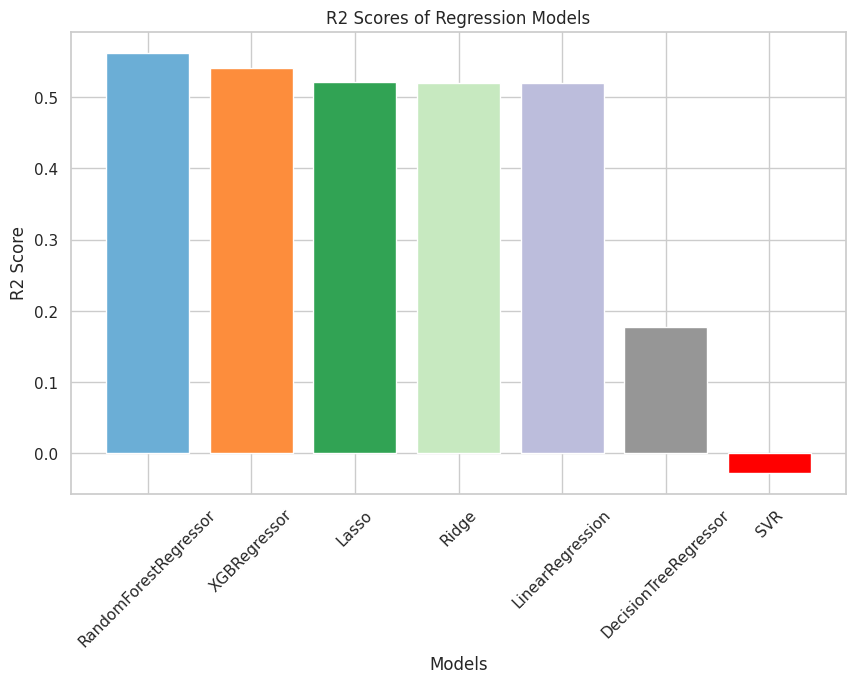

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the R2 scores in descending order
sorted_r2_scores = results.loc['R2_score'].sort_values(ascending=False)

# Set the color map for the bars
cmap = plt.cm.get_cmap('tab20c')

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(sorted_r2_scores.index):
    # Set the color of the bar based on its rank
    if i == 0:
        color = cmap(1)
    elif i == len(sorted_r2_scores) - 1:
        color = 'red'
    else:
        color = cmap((i + 1) / len(sorted_r2_scores))
    
    # Plot the bar
    ax.bar(model, sorted_r2_scores[model], color=color)

# Set the title and labels
ax.set_title('R2 Scores of Regression Models')
ax.set_xlabel('Models')
ax.set_ylabel('R2 Score')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


If we consider R2 Score as a metric we can clearly infer that Random Forest Regressor is working better than other models 
 

# Feature Engineering

In [106]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,156,-0.840601,0,-0.970732,4,1.747454,9,1999,1,0,1,3735.1380,24
1,8,-1.639173,1,-0.908111,14,-1.489023,3,2009,1,2,2,443.4228,14
2,662,1.096763,0,-0.956917,10,0.010040,9,1999,1,0,1,2097.2700,24
3,1121,1.498411,1,-1.281758,6,0.660050,0,1998,2,2,0,732.3800,25
4,1297,-0.928018,0,-1.281758,9,-1.399220,1,1987,0,2,1,994.7052,36


In [107]:
df2=df
df2["Outlet_Age"]=2023-df["Outlet_Establishment_Year"]

In [108]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Define the numerical columns in your data
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Standardize the numerical columns in your data
df2[num_cols] = scaler.fit_transform(df2[num_cols])

After Creating New Features and Doing the Standardization

In [109]:
X=df2[df.columns.difference(["Item_Outlet_Sales"])]
y=df2["Item_Outlet_Sales"]
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [110]:
feature_results=pd.DataFrame(modeling(regg_models, X_train, X_test, y_train, y_test, X, y))


In [101]:
feature_results=pd.DataFrame(feature_results)

In [103]:
feature_results

,LinearRegression,Lasso,Ridge,SVR,RandomForestRegressor,DecisionTreeRegressor,XGBRegressor
R2_score,-9.657935e-03,-9.351201e-03,-9.656591e-03,-3.102225e-02,-8.929224e-02,-1.029594e+00,-1.838952e-01
Score_Train,2.791238e-03,2.786795e-03,2.791238e-03,-5.293511e-02,8.462895e-01,1.000000e+00,6.073511e-01
Score_Test,-9.657935e-03,-9.351201e-03,-9.656591e-03,-3.102225e-02,-8.929224e-02,-1.029594e+00,-1.838952e-01
Normalized_RMSE,1.269044e-01,1.268851e-01,1.269043e-01,1.282400e-01,1.318141e-01,1.799261e-01,1.374188e-01
MSE,2.744220e+06,2.743386e+06,2.744216e+06,2.802288e+06,2.960664e+06,5.516374e+06,3.217792e+06
MAE,1.327195e+03,1.326960e+03,1.327194e+03,1.272408e+03,1.376751e+03,1.798155e+03,1.416688e+03
CV_Score_Mean,5.014659e-01,5.014680e-01,5.014666e-01,-5.270991e-02,5.514050e-01,1.618429e-01,5.188335e-01
CV_Score_Std,1.121103e-02,1.114739e-02,1.120488e-02,9.547778e-03,1.660682e-02,6.737991e-02,1.975412e-02


## Dimension Reduction (PCA)

In [111]:
from sklearn.decomposition import PCA

# create PCA object with desired number of components
n_components = 4
pca = PCA(n_components=n_components)

# fit PCA on the standardized numerical features
X_numerical = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']]
pca.fit(X_numerical)

# transform the standardized numerical features using the fitted PCA model
X_pca = pca.transform(X_numerical)

# Get the variance ratio for each component
variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative variance ratio
cumulative_variance_ratio = np.cumsum(variance_ratio)

# concatenate the transformed numerical features and the categorical features
df_pca = pd.DataFrame(np.concatenate((df[['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier','Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type','Outlet_Establishment_Year',"Item_Outlet_Sales"]].values, X_pca), axis=1),
                      columns=['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier','Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type','Outlet_Establishment_Year',"Item_Outlet_Sales","PC1","PC2","PC3","PC4"])


# use X for modeling


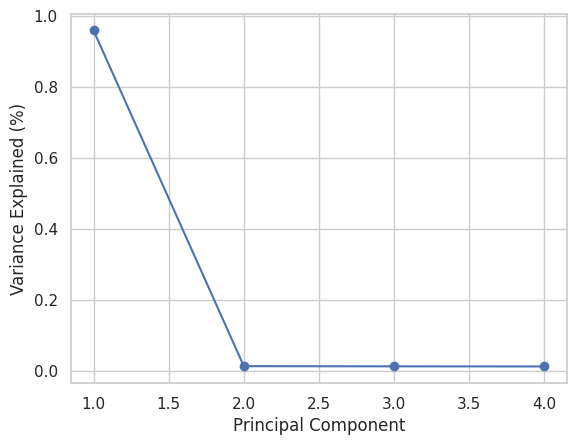

In [112]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.show()

In [113]:
df_pca.head()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Establishment_Year,Item_Outlet_Sales,PC1,PC2,PC3,PC4
0,0.0,156.0,4.0,9.0,0.0,1.0,1.0,1999.0,3735.1380,-1.178801,-0.805502,-0.050000,-2.006528
1,1.0,8.0,14.0,3.0,2.0,1.0,2.0,2009.0,443.4228,-11.176656,1.907929,-1.284253,-0.498806
2,0.0,662.0,10.0,9.0,0.0,1.0,1.0,1999.0,2097.2700,-1.175656,-1.040723,-0.908496,0.438839
3,1.0,1121.0,6.0,0.0,2.0,2.0,0.0,1998.0,732.3800,-0.178632,-1.839248,-0.946890,0.201815
4,0.0,1297.0,9.0,1.0,2.0,0.0,1.0,1987.0,994.7052,10.819702,1.197130,-1.793228,-0.276648


## Feature Selection

### Lasso Regression

In [114]:
X=df_pca[df_pca.columns.difference(["Item_Outlet_Sales"])]
y=df_pca["Item_Outlet_Sales"]
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [116]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression
from sklearn.metrics import r2_score
import pandas as pd

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create random forest model
rf = RandomForestRegressor(random_state=42)

# fit model on all features
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_all = r2_score(y_test, y_pred)

# feature selection using Lasso regression
lasso = SelectFromModel(Lasso(alpha=0.05, random_state=42))
lasso.fit(X_train, y_train)
X_train_lasso = lasso.transform(X_train)
X_test_lasso = lasso.transform(X_test)
rf.fit(X_train_lasso, y_train)
y_pred_lasso = rf.predict(X_test_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# feature selection using correlation
corr_features = X.corrwith(y).sort_values(ascending=False).index[:5]
X_train_corr = X_train[corr_features]
X_test_corr = X_test[corr_features]
rf.fit(X_train_corr, y_train)
y_pred_corr = rf.predict(X_test_corr)
r2_corr = r2_score(y_test, y_pred_corr)

# feature selection using k-best
k_best = SelectKBest(score_func=f_regression, k=5)
k_best.fit(X_train, y_train)
X_train_k_best = k_best.transform(X_train)
X_test_k_best = k_best.transform(X_test)
rf.fit(X_train_k_best, y_train)
y_pred_k_best = rf.predict(X_test_k_best)
r2_k_best = r2_score(y_test, y_pred_k_best)

# print R2 scores for all features and selected features
print('R2 score using all features:', r2_all)
print('R2 score using Lasso regression:', r2_lasso)
print('R2 score using correlation:', r2_corr)
print('R2 score using k-best:', r2_k_best)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+07, tolerance: 2.017e+06
  model = cd_fast.enet_coordinate_descent(


R2 score using all features: 0.5614046853664811
R2 score using Lasso regression: 0.5614046853664811
R2 score using correlation: 0.49241539560059444
R2 score using k-best: 0.5200684692268736


# Hyper Parameter Tuning 

In [117]:
target = df_pca['Item_Outlet_Sales']
features = df_pca.drop('Item_Outlet_Sales', axis=1)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Using Random Search CV as Grid Search Takes a lot of time 

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_dist = {'n_estimators': randint(100, 1000),
              'max_depth': randint(3, 10)}

# Create a random forest regressor
rf = RandomForestRegressor()

# Create a Random Search object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=5, scoring='r2', n_iter=10)

# Fit the Random Search object to the data
random_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best Parameters:', random_search.best_params_)
print('Best Score:', random_search.best_score_)


Best Parameters: {'max_depth': 9, 'n_estimators': 807}
Best Score: 0.5812582093366877


In [120]:
# Initialize the Random Forest Regressor with the best hyperparameters
rf_model = RandomForestRegressor(max_depth=9, n_estimators=807)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf_model.predict(X_test)

# Calculate the r2 score on the test data
r2 = r2_score(y_test, y_pred)
print("r2 Score: ", r2)

r2 Score:  0.5956591586539193


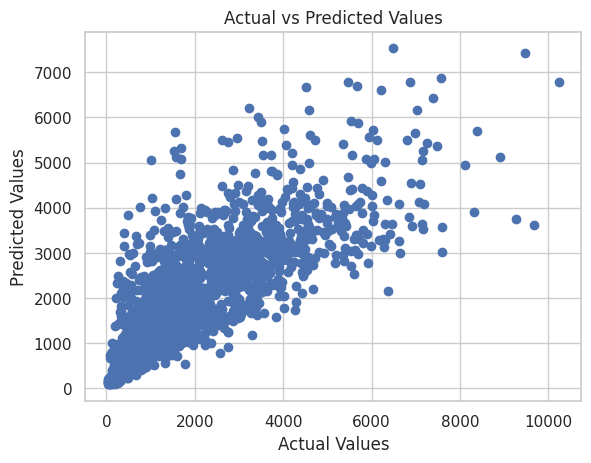

In [121]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Saving the model in Pickle File

In [122]:
import pickle

# Assuming you have trained your model and it's stored in a variable called "model"
# and you want to save it as "model.pkl" in your current directory

with open('model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
